In [4]:
# accuracy 구할 때 confusion matrix도 
import pandas as pd

df = pd.read_csv('./wine.csv')
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.isna().sum()


Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [6]:
from  sklearn.model_selection import train_test_split

X = df.drop(columns='Wine')
y = df['Wine']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape

(142, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))

1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))

0.9444444444444444 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))

In [7]:
# 원핫 인코딩
X = X.values
Y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10,input_shape=(13,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,493 (5.83 KB)

 Trainable params: 1,493 (5.83 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.2823 - loss: 48.4795 - val_accuracy: 0.1667 - val_loss: 6.3174
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1571 - loss: 8.7254 - val_accuracy: 0.0556 - val_loss: 12.7267
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1684 - loss: 14.0810 - val_accuracy: 0.0833 - val_loss: 11.9962
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1446 - loss: 11.4140 - val_accuracy: 0.2500 - val_loss: 6.4756
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2039 - loss: 6.1550 - val_accuracy: 0.2500 - val_loss: 5.7106
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3907 - loss: 6.3047 - val_accuracy: 0.4722 - val_loss: 4.0743
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3850 - loss: 3.9140 - val_accuracy: 0.2778 - val_loss: 6.5945
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2338 - loss: 4.9284 - val_accuracy: 0.4722 - val_loss: 3.

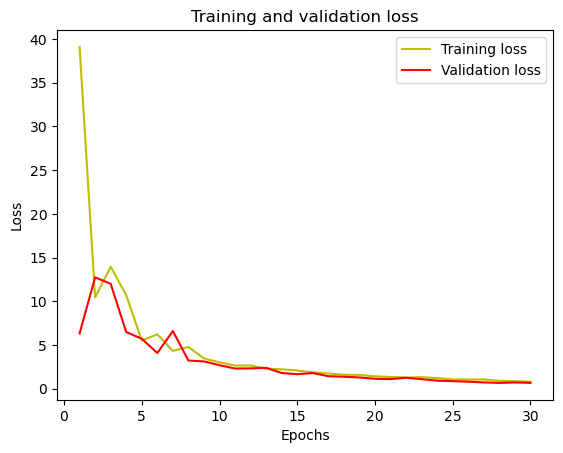

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

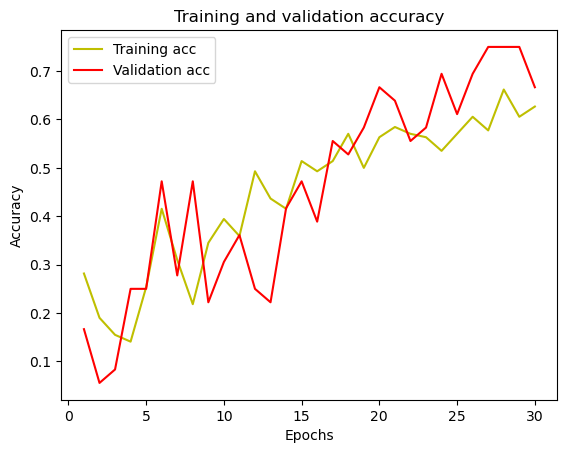

In [13]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()